scikit-learn linear Regression
macrotrends.net

In [1]:
# -*- coding: utf-8 -*-
from google.colab import files
uploaded = files.upload()

scatter plot



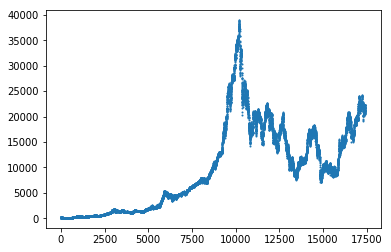

scatter plot + regression analysis

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
-7.3429428282118565e+25
4.1411091144260664e+16
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
-1.594603965664595
6175.670004122012
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, to

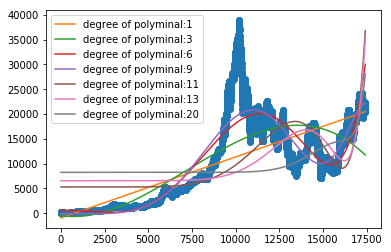

scatter plot + regression analysis (recent 1000 data)



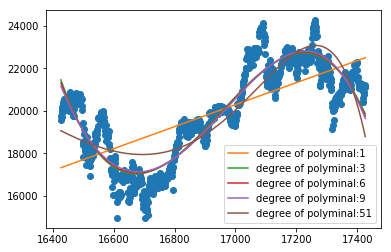

In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import codecs
import unicodedata

# testClf
def testClf(clf, x_train_array, y_flg_train_array, x_test_array, y_flg_test_array):

    print(clf)
    clf.fit(x_train_array, y_flg_train_array)
    result = clf.predict(x_test_array)
    print(clf.score(x_test_array, y_flg_test_array))
    print(np.mean(np.abs(np.array(result) - np.array(y_flg_test_array))))


# open nikkei csv file　
fp=open("nikkei-225-index-historical-chart-data.csv", "r", encoding='cp932')

b=[]
# skip header part
for line in fp:
  tmp=line.split(",")
  if tmp[0]=="date":
    break
# read nikkei stock average
for line in fp:
    tmp=line.split(",")
    b.append(float(tmp[-1].strip()))
#print(b)
nikkei=np.array(b)

# check data
n = len(nikkei)
x_base = np.array(np.arange(0, len(nikkei), 1))
#print(x_base)
#print(x_base.shape)

y_base = nikkei
#print(y_base)
#print(y_base.shape)

# 生成したデータセット(x_base, y_base) を散布図出力して確認
# pl.scatter(): s=点のサイズ
print("scatter plot\n")
import pylab as pl
pl.figure()
pl.scatter(x_base, y_base, s=1)
pl.show()

# 散布図＋回帰分析 全データ
print("scatter plot + regression analysis\n")
x_base=x_base.reshape(n,1)
xt = x_base
#
# plot samples 
plt.plot(x_base, y_base, 'o')

num=15000
x_train_array=x_base[0:num]
y_train_array=y_base[0:num]
x_test_array=x_base[num+1:-1]
y_test_array=y_base[num+1:-1]

# SGDRegressor
clf = SGDRegressor()
testClf(clf, x_train_array, y_train_array, x_test_array, y_test_array)

# DecisionTreeRegressor
clf = DecisionTreeRegressor()
testClf(clf, x_train_array, y_train_array, x_test_array, y_test_array)

# SVM
clf = SVR(gamma='scale')
testClf(clf, x_train_array, y_train_array, x_test_array, y_test_array)

# train linear regression models with different polynomial basis
deg = [1, 3, 6, 9, 11, 13, 20]
for d in deg:
    regr=Pipeline([('poly', PolynomialFeatures(degree=d)), ('linear', LinearRegression())])
    regr.fit(x_base,y_base)
    # make predictions
    yt = regr.predict(xt)
    # plot samples and regression result
    plt.plot(xt, yt, label='degree of polyminal:%d' % (d))
plt.legend()
plt.show()

# 散布図＋回帰分析 直前Nデータ
n=1000 # modify and compare
print("scatter plot + regression analysis (recent %d data)\n" % n)
x_base=x_base[-1*(n+1):-1].reshape(n,1)
xt = x_base
y_base=y_base[-1*(n+1):-1]
#
# plot samples 
plt.plot(x_base, y_base, 'o')
# train linear regression models with different polynomial basis
deg = [1, 3, 6, 9, 51] # modify and compare
for d in deg:
    regr=Pipeline([('poly', PolynomialFeatures(degree=d)), ('linear', LinearRegression())])
    regr.fit(x_base,y_base)
    # make predictions
    yt = regr.predict(xt)
    # plot samples and regression result
    plt.plot(xt, yt, label='degree of polyminal:%d' % (d))
plt.legend()
plt.show()